# Relatório de Implementação - Fecho convexo 2D

* **ALUNO**: Felipe Alves Ferreira
* **MATRÍCULA**: 1921167

## Gráfico com o Fecho Convexo da Nuvem de Pontos 1

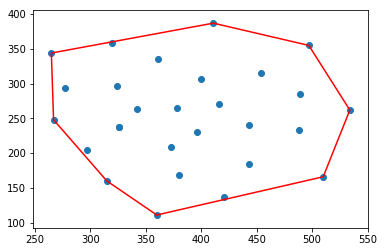

In [56]:
plot_fecho_convexo(df_nuvem1, fecho1)

## Vértices do Fecho Convexo da Nuvem de Pontos 1

In [57]:
for i in fecho1:
  print(i)

(360, 111)
(510, 166)
(534, 262)
(497, 355)
(411, 387)
(265, 344)
(267, 248)
(315, 160)


## Gráfico com o Fecho Convexo da Nuvem de Pontos 2

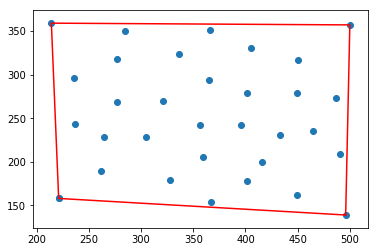

In [58]:
plot_fecho_convexo(df_nuvem2, fecho2)

## Vértices do Fecho Convexo da Nuvem de Pontos 2

In [59]:
for i in fecho2:
  print(i)

(496, 139)
(500, 357)
(214, 359)
(221, 158)


# Código-Fonte

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from functools import cmp_to_key

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def load_and_sort_points(df):
  xs = df['x'].tolist()
  ys = df['y'].tolist()
  lista = []
  lista_points = []
  for i in range(len(xs)):
    lista.append([xs[i],ys[i]])
  
  for i in sorted(lista):
    lista_points.append(Point(i[0],i[1]))

  return lista_points

In [0]:
def plot_convex_hull(df, x_list, y_list):
    xs = df['x'].tolist()
    ys = df['y'].tolist()

    xs.append(df['x'].values[0])
    ys.append(df['y'].values[0])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(x_list,y_list, 'r')
    plt.scatter(xs, ys)
    plt.show()

In [0]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def subtract(self, p):
    	return Point(self.x - p.x, self.y - p.y)

    def __str__(self):
        return '(' + str(self.x) + ', ' + str(self.y) + ')'

# calcula o produto cruzado do vetor p1 e p2
# Se p1 estiver no sentido horário a partir da origem p2 wrt, ele retornará o valor + ve
# se p2 for anti-horário a partir da origem p2 wrt, ele retornará -ve value
# se p1 p2 e origem são colineares, então ele retorna 0
def cross_product(p1, p2):
	return p1.x * p2.y - p2.x * p1.y

In [0]:
# retorna o produto cruzado do vetor p1p3 e p1p2
# se p1p3 estiver no sentido horário de p1p2, ele retornará o valor + ve
# se p1p3 estiver no sentido anti-horário de p1p2, retornará -ve value
# se p1 p2 e p3 são colineares, retorna 0
def direction(p1, p2, p3):
	return  cross_product(p3.subtract(p1), p2.subtract(p1))

In [0]:
def find_min_y(points):
    miny = 999999
    mini = 0
    for i, point in enumerate(points):
        if point.y < miny:
            miny = point.y
            mini = i
        if point.y == miny:
            if point.x < points[mini].x:
                mini = i
    return points[mini], mini

# comparador para a ordenação
def polar_comparator(p1, p2, p0):
    d = direction(p0, p1, p2)
    if d < 0:
        return -1
    if d > 0:
        return 1
    if d == 0:
        if distance_sq(p1, p0) < distance_sq(p2, p0):
            return -1
        else:
            return 1

def algoritmo_graham(points):
    # seja p0 o ponto com coordenada y mínima,
    # ou o ponto mais à esquerda em caso de empate
    p0, index = find_min_y(points)
    
    # swap p[0] com p[index]
    points[0], points[index] = points[index], points[0]
    
    # ordena os pontos (exceto p0) de acordo com o ângulo polar
    # feita pelo segmento de linha com eixo x no sentido anti-horário
    sorted_polar = sorted(points[1:], key=cmp_to_key(lambda p1, p2: polar_comparator(p1, p2, p0)))
    
    # se mais de dois pontos forem colineares com p0, mantenha o mais distante
    to_remove = []
    for i in range(len(sorted_polar) - 1):
        d = direction(sorted_polar[i], sorted_polar[i + 1], p0)
        if d == 0:
            to_remove.append(i)
    sorted_polar = [i for j, i in enumerate(sorted_polar) if j not in to_remove]

   
    m = len(sorted_polar)
    if m < 2:
        print('Fecho convexo vazio !')

    else:
        stack = []
        stack_size = 0
        stack.append(points[0])
        stack.append(sorted_polar[0])
        stack.append(sorted_polar[1])
        stack_size = 3

        for i in range(2, m):
            while (True):
                d = direction(stack[stack_size - 2], stack[stack_size - 1], sorted_polar[i])
                if d < 0: # se virar à esquerda
                    break
                else: # se virar à esquerda
                    stack.pop()
                    stack_size -= 1
            stack.append(sorted_polar[i])
            stack_size += 1
    return stack

In [0]:
def plot_fecho_convexo(df, points_fecho):
  lista_x = []
  lista_y = []
  for i in points_fecho:
    lista_x.append(i.x)
    lista_y.append(i.y)
  lista_x.append(points_fecho[0].x)
  lista_y.append(points_fecho[0].y)

  plot_convex_hull(df, lista_x, lista_y)

In [52]:
df_nuvem1 = pd.read_csv("/content/drive/My Drive/geometria_computacional/fecho1.txt", sep="   ", header=None, names=["x","y"])
df_nuvem2 = pd.read_csv("/content/drive/My Drive/geometria_computacional/fecho2.txt", sep="   ", header=None, names=["x","y"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [0]:
points1 = load_and_sort_points(df_nuvem1)
points2 = load_and_sort_points(df_nuvem2)

In [0]:
fecho1 = algoritmo_graham(points1)
fecho2 = algoritmo_graham(points2)